# Ulvi Bajarani
## SID: 20539914

#### Question 1

#### Given two histograms of color, calculate the minimum intersection metric given by the following formula. Use NumPy to create two test histograms of size 10, populate them with random data, then calculate the distance.

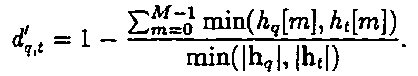

In [89]:
import numpy as np
import cv2

In [240]:
hue_image_1 = np.random.randint(low=0, high=181, size=(64, 64))
saturation_image_1 = np.random.randint(low=0, high=256, size=(64, 64))
intensity_image_1 = np.random.randint(low=0, high=256, size=(64, 64))
hue_image_2 = np.random.randint(low=0, high=181, size=(64, 64))
saturation_image_2 = np.random.randint(low=0, high=256, size=(64, 64))
intensity_image_2 = np.random.randint(low=0, high=256, size=(64, 64))

In [290]:
histogram_image_hue_1 = np.histogram(hue_image_1, bins=10)
histogram_image_saturation_1 = np.histogram(saturation_image_1, bins=10)
histogram_image_intensity_1 = np.histogram(intensity_image_1, bins=10)
histogram_image_hue_2 = np.histogram(hue_image_2, bins=10)
histogram_image_saturation_2 = np.histogram(saturation_image_2, bins=10)
histogram_image_intensity_2 = np.histogram(intensity_image_2, bins=10)

In [278]:
numerator_sum_hue = 0
numerator_sum_saturation = 0
numerator_sum_intensity = 0

for i in range(0, len(histogram_image_hue_1[0])):
    numerator_sum_hue += np.minimum(histogram_image_hue_1[0][i], histogram_image_hue_2[0][i])
for i in range(0, len(histogram_image_saturation_1[0])):
    numerator_sum_saturation += np.minimum(histogram_image_saturation_1[0][i], histogram_image_saturation_2[0][i])
for i in range(0, len(histogram_image_intensity_1[0])):
    numerator_sum_intensity += np.minimum(histogram_image_intensity_1[0][i], histogram_image_intensity_2[0][i])
    
denominator_hue = np.minimum(np.sum(histogram_image_hue_1[0]),np.sum(histogram_image_hue_2[0]))
denominator_saturation = np.minimum(np.sum(histogram_image_saturation_1[0]),np.sum(histogram_image_saturation_2[0]))
denominator_intensity = np.minimum(np.sum(histogram_image_intensity_1[0]),np.sum(histogram_image_intensity_2[0]))

In [287]:
distance_hue = 1-(numerator_sum_hue/denominator_hue)
distance_saturation = 1-(numerator_sum_saturation/denominator_saturation)
distance_intensity = 1-(numerator_sum_intensity/denominator_intensity)
print("Hue distance is: " + str(distance_hue))
print("Saturation distance is: " +str(distance_saturation))
print("Intensity distance is: " +str(distance_intensity))

Hue distance is: 0.027099609375
Saturation distance is: 0.02392578125
Intensity distance is: 0.033203125


#### Question 2

#### You will be given an image and you goal is to create and show the HOG features for those features. You can use “from skimage import feature” to calculate the hog feature.
##### a. Your notebook will read the image, show the original image, calculate the hog, then show the hog image.

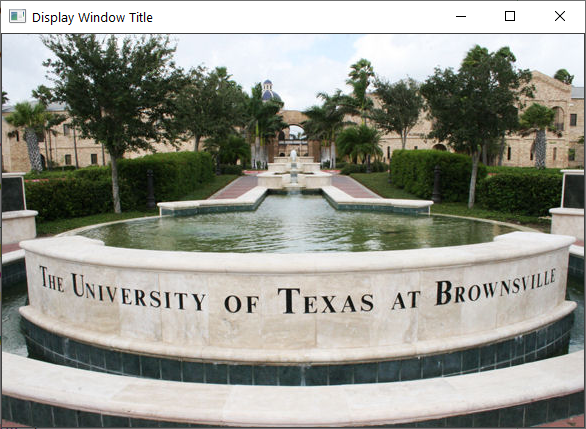
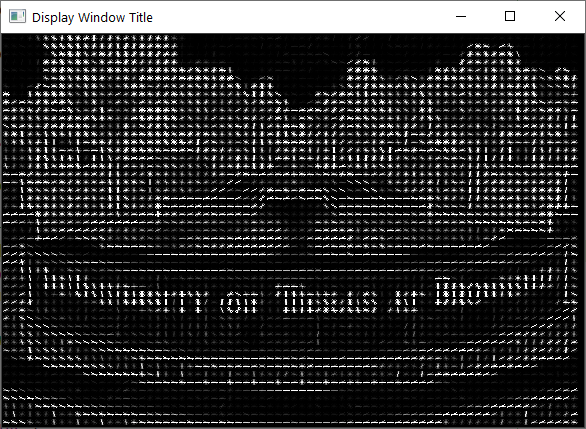

In [15]:
import matplotlib.pyplot as plt
import cv2
import sys
from skimage.feature import hog

image = cv2.imread("ClassHierarchy.jpg")
cv2.imshow('Original Image', image)
cv2.waitKey(0)

fd, hog_image = hog(image, visualize=True, multichannel=True)

cv2.imshow('HOG of Image', hog_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Question 3

#### Given an image (or a video) with possible blood spots/areas in it. Use the HSV color space to highlight the area with blood (using a bit-wise mask), if present.
##### a. Check the color as feature slides, and particularly the python code that detects the blue caps. You should understand the code there, then adjust it to detect the blood.

In [5]:
import cv2
import numpy as np

#Video Detection Code

cap = cv2.VideoCapture("test.mp4")

while(True):
    _, frame = cap.read()
    
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    lower_red1 = np.array([0,120,70])
    upper_red1 = np.array([10,255,255])

    bitwise_mask1 = cv2.inRange(hsv, lower_red1, upper_red1)

    lower_red2 = np.array([170,120,70])
    upper_red2 = np.array([180,255,255])

    bitwise_mask2 = cv2.inRange(hsv, lower_red2, upper_red2)

    bitwise_mask = bitwise_mask1 + bitwise_mask2

    result = cv2.bitwise_and(frame, frame, mask=bitwise_mask)
    cv2.imshow('Original Image',frame)
    cv2.imshow('Bitwise Mask', bitwise_mask)
    cv2.imshow('Result of Detection', result)

    k = cv2.waitKey(5) & 0xFF
    if k == 27: 
        break

cv2.destroyAllWindows()

cap.release()

In [6]:
import cv2
import numpy as np

#Image Detection Code

image = cv2.imread("bloodImage.jpg")

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_red1 = np.array([0,120,70])
upper_red1 = np.array([10,255,255])

bitwise_mask1 = cv2.inRange(hsv, lower_red1, upper_red1)

lower_red2 = np.array([170,120,70])
upper_red2 = np.array([180,255,255])

bitwise_mask2 = cv2.inRange(hsv, lower_red2, upper_red2)

bitwise_mask = bitwise_mask1 + bitwise_mask2

result = cv2.bitwise_and(image, image, mask=bitwise_mask)
cv2.imshow('Original Image',image)
cv2.imshow('Bitwise Mask', bitwise_mask)
cv2.imshow('Result of Detection', result)
cv2.waitKey(0)

cv2.destroyAllWindows()